In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Za običan model

In [4]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Za SMOTE

In [3]:
%store -r X_train_SMOTE
%store -r y_train_SMOTE
X_train = pd.DataFrame(X_train.iloc[:, :-1], columns=X_train.columns[:-1])
X_test = pd.DataFrame(X_test.iloc[:, :-1], columns=X_test.columns[:-1])
X_train_SMOTE = pd.DataFrame(X_train_SMOTE.iloc[:, :-1], columns=X_train_SMOTE.columns[:-1])

**Model treniran nad obicnim podacima**

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params)
best_clf_rf.fit(X_train, y_train)

y_pred_best = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_best)

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_report_rf)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.1s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.851 total time=   0.1s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.1s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.851 total time=   0.1s
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.3s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.828 total time=   0.3s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.876 total time=   0.3s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.843 total time=   0.3s
[CV 5/5

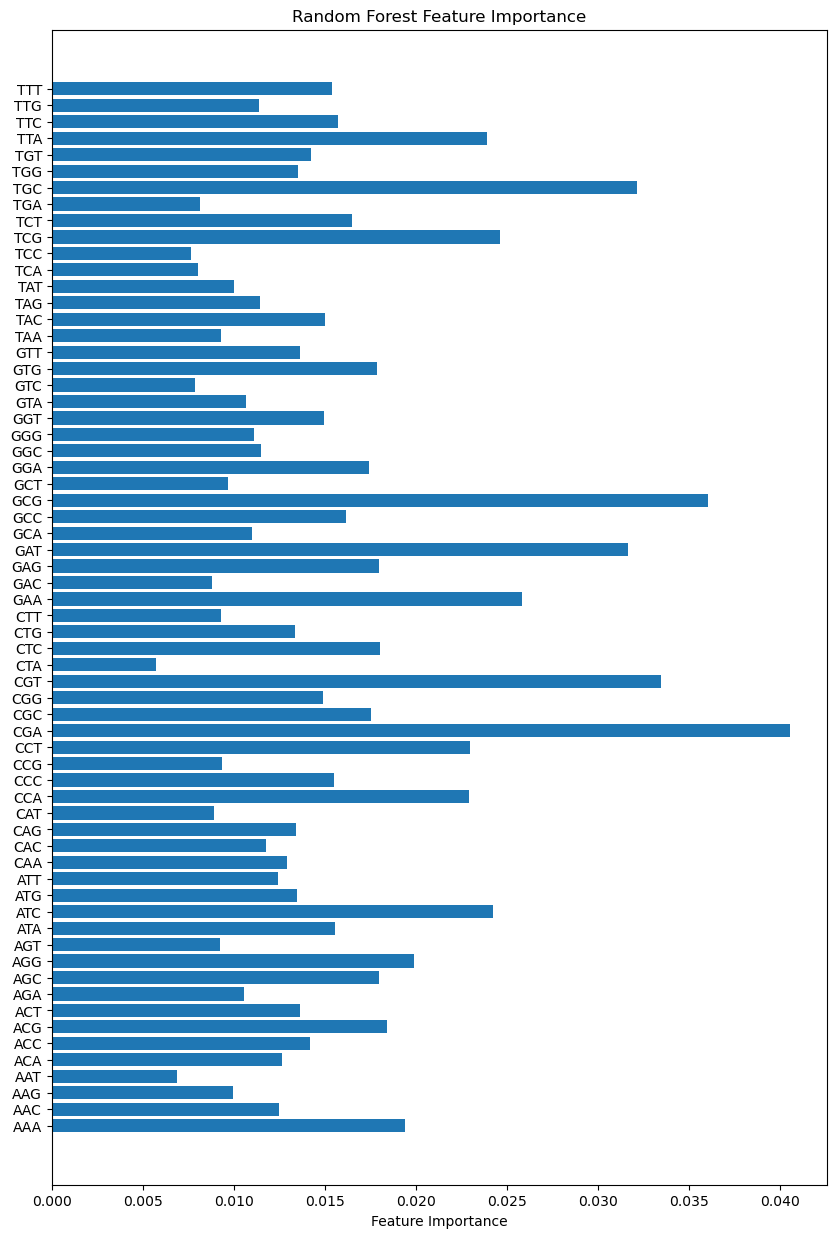

In [35]:
feature_names = X_train.columns

plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.show()

**Model treniran nad podacima na kojima je primenjena SMOTE tehnika**

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params)
best_clf_rf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_best = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_best_SMOTE = accuracy_score(y_test, y_pred_best)
precision_best_SMOTE = precision_score(y_test, y_pred_best, average='weighted')
recall_best_SMOTE = recall_score(y_test, y_pred_best, average='weighted')
f1_best_SMOTE = f1_score(y_test, y_pred_best, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best_SMOTE, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best_SMOTE, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best_SMOTE, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best_SMOTE, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.917 total time=   1.1s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.932 total time=   1.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.953 total time=   1.0s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.950 total time=   1.0s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   1.1s
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.917 total time=   2.4s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   2.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.962 total time=   2.1s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.950 total time=   2.1s
[CV 5/5

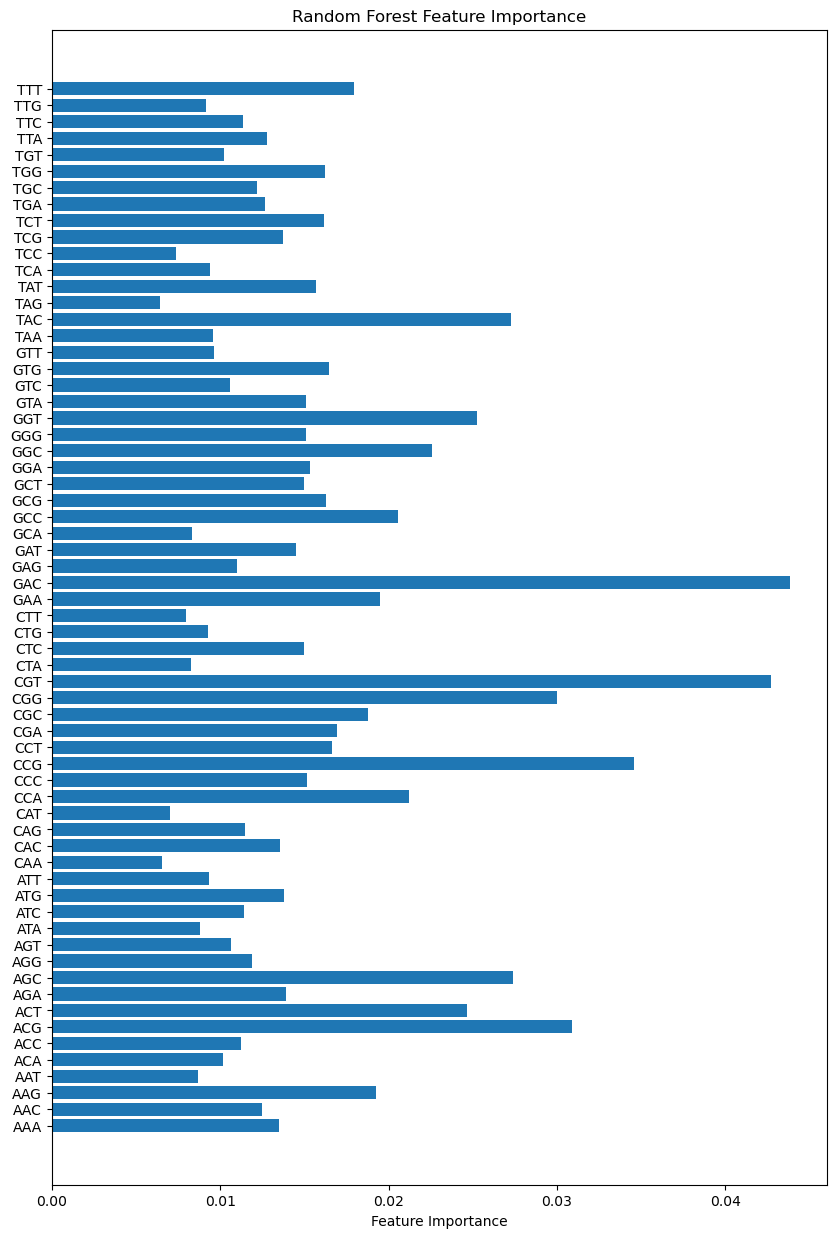

In [37]:
feature_names = X_train_SMOTE.columns

plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.show()

**Model treniran nad podacima na koje su primenjene tezine klasa**

In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = RandomForestClassifier(random_state=42, class_weight=class_weight)

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params, class_weight=class_weight)
best_clf_rf.fit(X_train, y_train)

y_pred_best = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_best_cw = accuracy_score(y_test, y_pred_best)
precision_best_cw = precision_score(y_test, y_pred_best, average='weighted')
recall_best_cw = recall_score(y_test, y_pred_best, average='weighted')
f1_best_cw = f1_score(y_test, y_pred_best, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best_cw, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best_cw, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best_cw, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best_cw, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.811 total time=   0.3s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.811 total time=   0.3s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.868 total time=   0.3s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.3s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.3s
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.820 total time=   0.7s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.820 total time=   0.7s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.9s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.843 total time=   0.8s
[CV 5/5

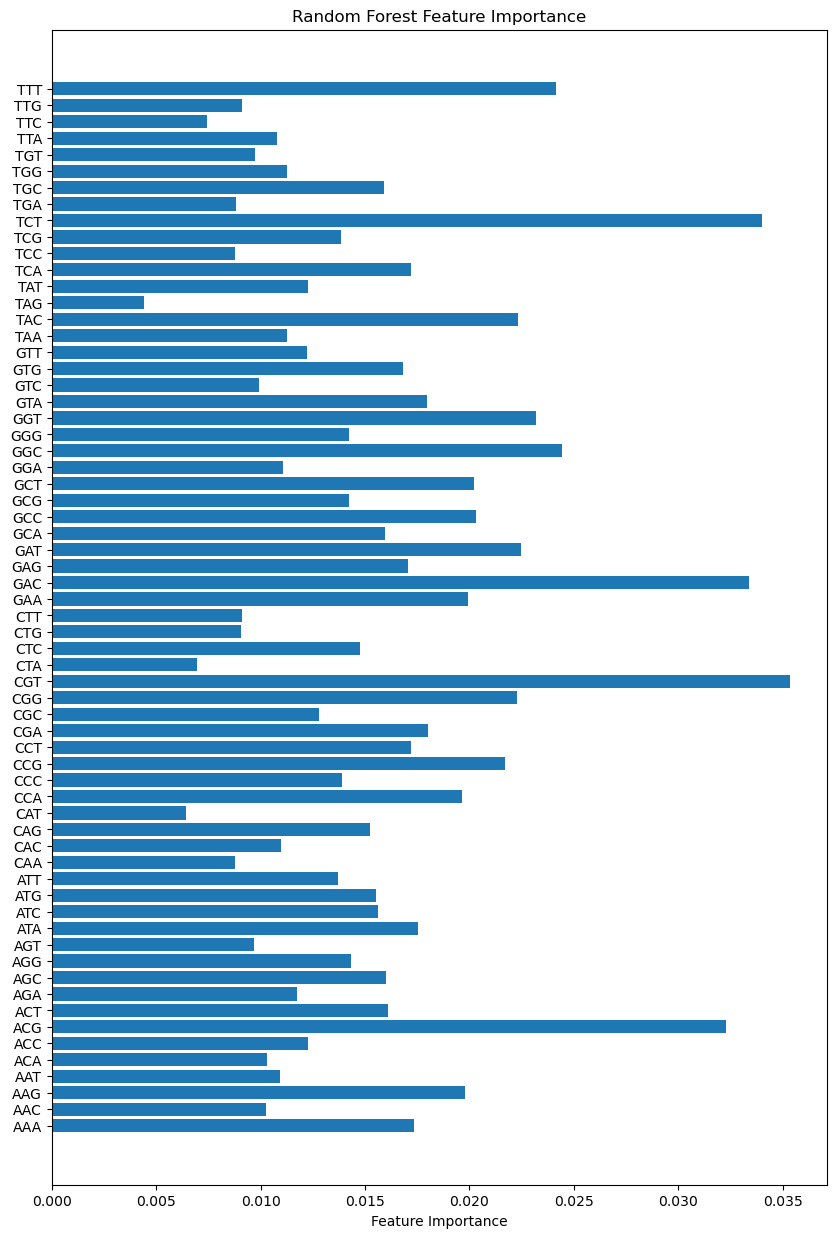

In [39]:
feature_names = X_train.columns

plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.show()

**Poredjenje modela**

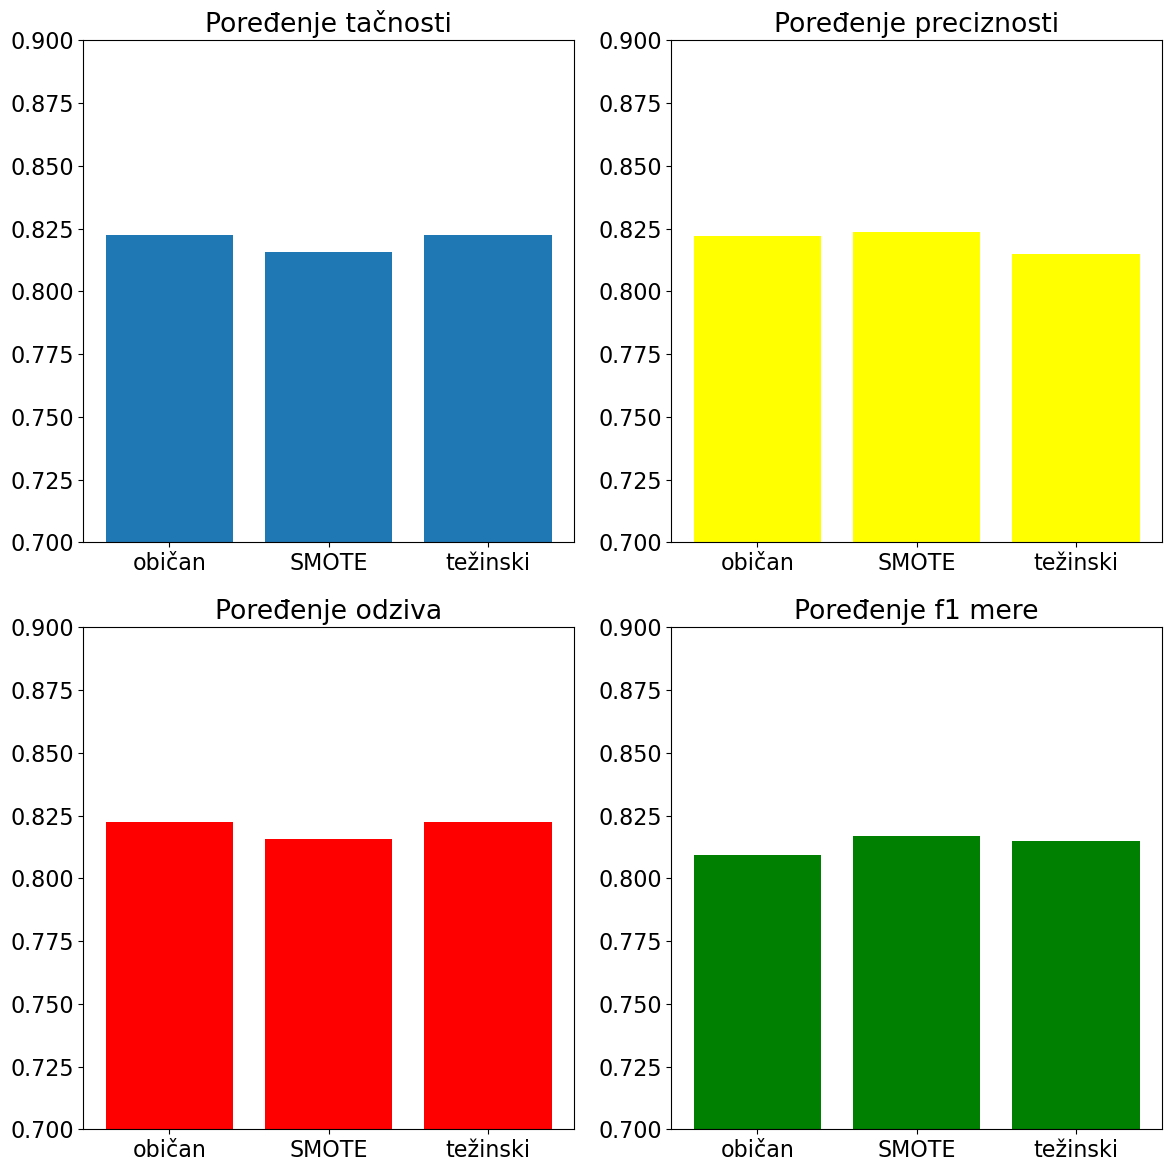

In [43]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.bar(['običan', 'SMOTE', 'težinski'], [accuracy_best, accuracy_best_SMOTE, accuracy_best_cw])
plt.title('Poređenje tačnosti')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 2)
plt.bar(['običan', 'SMOTE', 'težinski'], [precision_best, precision_best_SMOTE, precision_best_cw], color='yellow')
plt.title('Poređenje preciznosti')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 3)
plt.bar(['običan', 'SMOTE', 'težinski'], [recall_best, recall_best_SMOTE, recall_best_cw], color='red')
plt.title('Poređenje odziva')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 4)
plt.bar(['običan', 'SMOTE', 'težinski'], [f1_best, f1_best_SMOTE, f1_best_cw], color='green')
plt.title('Poređenje f1 mere')
plt.ylim(0.7, 0.9)

plt.savefig('RFC_poredjenje.png')
plt.tight_layout()
plt.show()

In [41]:
rfc_best_accuracy = accuracy_best_cw

In [42]:
%store rfc_best_accuracy

Stored 'rfc_best_accuracy' (float64)
